In [1]:
!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --u0ser
!jupyter nbextensions_configurator enable --user
!pip install jupyter_nbextensions_configurator
!jupyter nbextension enable spellchecker/main
!pip install --upgrade dtale

Install jupyter_contrib_nbextensions.

Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--user

    Perform the operation for the current user

--system

    Perform the operation system-wide

--sys-prefix

    Use sys.prefix as the prefix for installing

--overwrite

    Force overwrite of existing nbextension files, regardless of modification time

--symlink

    Create symlinks for nbextensions instead of copying files

--skip-running-check

    Perform actions even if notebook server(s) are already running

--perform-running-check

    Only perform actions if no notebook server(s) are running

-s

    Create symlinks for nbextensions instead of copying files

--only-config

    Edit config files, but do not install/remove nbextensions files

--only-files

[C 10:12:46 InstallContribNbextensionsApp] Bad config encountered during initialization:
[C 10:12:46 InstallContribNbextensionsApp] Unrecognized flag: '--u0ser'
Enabling: jupyter_nbextensions_configurator
- Writing config: C:\Users\Pablo\.jupyter
    - Validating...
      jupyter_nbextensions_configurator 0.4.1 ok
Enabling notebook nbextension nbextensions_configurator/config_menu/main...
Enabling tree nbextension nbextensions_configurator/tree_tab/main...


Enabling notebook extension spellchecker/main...
      - Validating: ok


Requirement already up-to-date: dtale in d:\programas\conda\lib\site-packages (1.8.10)


In [2]:
import pandas as pd
import numpy as np
import dtale
import matplotlib


# 2. Data Preparation
## Neighborhood Profile

Load the file with the **Neighborhood profile for Toronto**

In [3]:
csv_path='https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv'
df_profile=pd.read_csv(csv_path,index_col=["Topic","Characteristic"])
df_profile.drop(["_id","Data Source","Category"],axis=1,inplace=True) #Remove unnecessary columns
df_profile.replace("No Designation","NaN",inplace=True) #Replace No Designation by NaN
df_profile.head(10)

City of Toronto  \
Topic                     Characteristic                                                  
Neighbourhood Information Neighbourhood Number                                      NaN   
                          TSNS2020 Designation                                      NaN   
Population and dwellings  Population, 2016                                    2,731,571   
                          Population, 2011                                    2,615,060   
                          Population Change 2011-2016                             4.50%   
                          Total private dwellings                             1,179,057   
                          Private dwellings occupied by usual residents       1,112,929   
                          Population density per square kilometre                 4,334   
                          Land area in square kilometres                          630.2   
Age characteristics       Children (0-14 years)                                 398,135   

                                                                        Agincourt North  \
Topic                     Characteristic                                                  
Neighbourhood Information Neighbourhood Number                                      129   
                          TSNS2020 Designation                                      NaN   
Population and dwellings  Population, 2016                                       29,113   
                          Population, 2011                                       30,279   
                          Population Change 2011-2016                            -3.90%   
                          Total private dwellings                                 9,371   
                          Private dwellings occupied by usual residents           9,120   
                          Population density per square kilometre                 3,929   
                          Land area in square kilometres                           7.41   
Age characteristics       Children (0-14 years)                                   3,840   

                                                                        Agincourt South-Malvern West  \
Topic                     Characteristic                                                               
Neighbourhood Information Neighbourhood Number                                                   128   
                          TSNS2020 Designation                                                   NaN   
Population and dwellings  Population, 2016                                                    23,757   
                          Population, 2011                                                    21,988   
                          Population Change 2011-2016                                          8.00%   
                          Total private dwellings                                              8,535   
                          Private dwellings occupied by usual residents                        8,136   
                          Population density per square kilometre                              3,034   
                          Land area in square kilometres                                        7.83   
Age characteristics       Children (0-14 years)                                                3,075   

                                                                        Alderwood  \
Topic                     Characteristic                                            
Neighbourhood Information Neighbourhood Number                                 20   
                          TSNS2020 Designation                                NaN   
Population and dwellings  Population, 2016                                 12,054   
                          Population, 2011                                 11,904   
                          Population Change 2011-2016                       1.30%   
                          Total private dw

In [4]:
Thistletown_profile= df_profile[['City of Toronto',"Thistletown-Beaumond Heights"]]
#Thistletown_profile.dropna(subset=['Thistletown-Beaumond Heights'],axis=0,inplace=True) 
Thistletown_profile
Thistletown_profile.head()

City of Toronto  \
Topic                     Characteristic                                
Neighbourhood Information Neighbourhood Number                    NaN   
                          TSNS2020 Designation                    NaN   
Population and dwellings  Population, 2016                  2,731,571   
                          Population, 2011                  2,615,060   
                          Population Change 2011-2016           4.50%   

                                                      Thistletown-Beaumond Heights  
Topic                     Characteristic                                            
Neighbourhood Information Neighbourhood Number                                   3  
                          TSNS2020 Designation                                 NIA  
Population and dwellings  Population, 2016                                  10,360  
                          Population, 2011                                  10,138  
                          Population Change 2011-2016                        2.20%

In [5]:
dtale.show(df_profile)

In [6]:
#Demographic and dwelling values
columns_for_introduction=[('Population and dwellings', 'Population, 2016'),
 ('Population and dwellings', 'Population density per square kilometre'), 
 ('Age characteristics', 'Children (0-14 years)'),
 ('Age characteristics', 'Youth (15-24 years)'),
 ('Age characteristics', 'Working Age (25-54 years)'),
 ('Age characteristics', 'Pre-retirement (55-64 years)'),
 ('Age characteristics', 'Seniors (65+ years)'),
 ('Household and dwelling characteristics',
  'Occupied private dwellings by structural type of dwelling'),
 ('Household and dwelling characteristics', '  Single-detached house'),('Household and dwelling characteristics', ' Average household size'), 
('Family characteristics', '  Couples with children'),('Family characteristics', '  Couples without children'),
('Family characteristics of adults', 'Persons living alone (total)'),('Family characteristics of adults', 'Persons age 65+ living alone (total)'),
]
Thistletown_profile.loc[columns_for_introduction]

City of Toronto  \
Topic                                  Characteristic                                                       
Population and dwellings               Population, 2016                                         2,731,571   
                                       Population density per square kilometre                      4,334   
Age characteristics                    Children (0-14 years)                                      398,135   
                                       Youth (15-24 years)                                        340,270   
                                       Working Age (25-54 years)                                1,229,555   
                                       Pre-retirement (55-64 years)                               336,670   
                                       Seniors (65+ years)                                        426,945   
Household and dwelling characteristics Occupied private dwellings by structural type o...       1,112,930   
                                         Single-detached house                                    269,675   
                                        Average household size                                       2.42   
Family characteristics                   Couples with children                                    316,070   
                                         Couples without children                                 250,085   
Family characteristics of adults       Persons living alone (total)                               359,955   
                                       Persons age 65+ living alone (total)                       107,215   

                                                                                          Thistletown-Beaumond Heights  
Topic                                  Characteristic                                                                   
Population and dwellings               Population, 2016                                                         10,360  
                                       Population density per square kilometre                                   3,130  
Age characteristics                    Children (0-14 years)                                                     1,730  
                                       Youth (15-24 years)                                                       1,410  
                                       Working Age (25-54 years)                                                 4,160  
                                       Pre-retirement (55-64 years)                                              1,195  
                                       Seniors (65+ years)                                                       1,880  
Household and dwelling characteristics Occupied private dwellings by structural type o...                         3280  
                                         Single-detached house                                                    1575  
                                        Average household size                                                    3.09  
Family characteristics                   Couples with children                                                    1310  
                                         Couples without children                                                  805  
Family characteristics of adults       Persons living alone (total)                                                575  
                                       Persons age 65+ living alone (total)                                        300

In [7]:
#Income of individuals
Thistletown_profile.iloc[988:997]

City of Toronto  \
Topic                         Characteristic                                       
Income of individuals in 2015     Under $10,000 (including loss)         395,780   
                                  $10,000 to $19,999                     425,580   
                                  $20,000 to $29,999                     330,405   
                                  $30,000 to $39,999                     261,435   
                                  $40,000 to $49,999                     213,815   
                                  $50,000 to $59,999                     154,925   
                                  $60,000 to $69,999                     112,495   
                                  $70,000 to $79,999                      84,300   
                                  $80,000 and over                       208,615   

                                                                 Thistletown-Beaumond Heights  
Topic                         Characteristic                                                   
Income of individuals in 2015     Under $10,000 (including loss)                        1,560  
                                  $10,000 to $19,999                                    1,765  
                                  $20,000 to $29,999                                    1,480  
                                  $30,000 to $39,999                                    1,150  
                                  $40,000 to $49,999                                      765  
                                  $50,000 to $59,999                                      490  
                                  $60,000 to $69,999                                      285  
                                  $70,000 to $79,999                                      195  
                                  $80,000 and over                                        250

In [8]:
Thistletown_inmigration=Thistletown_profile.loc[[('Immigrants by selected place of birth','  Europe'),('Immigrants by selected place of birth','  Asia'),
                         ('Immigrants by selected place of birth','  Americas'),('Immigrants by selected place of birth','  Africa'),
                         ('Immigrants by selected place of birth','  Oceania and other places of birth')]].apply(lambda x: pd.to_numeric(x.str.replace(',','')))
Thistletown_inmigration.sort_values(['Thistletown-Beaumond Heights'],ascending=False, axis=0, inplace=True) 
Thistletown_inmigration.loc[('Immigrants by selected place of birth', 'Total'), 
                            Thistletown_inmigration.columns.tolist()] = pd.Series(Thistletown_inmigration.sum())
Thistletown_inmigration=Thistletown_inmigration.astype(int)
Thistletown_inmigration

City of Toronto  \
Topic                                 Characteristic                                         
Immigrants by selected place of birth   Asia                                        674490   
                                        Americas                                    212010   
                                        Europe                                      298270   
                                        Africa                                       77445   
                                        Oceania and other places of birth             3780   
                                      Total                                        1265995   

                                                                           Thistletown-Beaumond Heights  
Topic                                 Characteristic                                                     
Immigrants by selected place of birth   Asia                                                       2655  
                                        Americas                                                   1205  
                                        Europe                                                     1140  
                                        Africa                                                      460  
                                        Oceania and other places of birth                            10  
                                      Total                                                        5470

## Criminality

In [9]:
csv_path_police='https://opendata.arcgis.com/datasets/f4c2e5de021f4836a3caf77f8421f487_0.csv?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D'
df_police=pd.read_csv(csv_path_police) 

In [10]:
df_police["Neighbourhood"]=  df_police.Neighbourhood.str.replace('(\(\d\d\d\))|(\(\d\d\))|(\(\d\))', '')
#There is a space at the end of each Neighborhood so strip is applied to remove it
df_police["Neighbourhood"]=df_police.Neighbourhood.str.strip()
df_police.head()

,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,101,GO-20141670830,1393516800000,1394388840000,House,2132,200,Theft From Motor Vehicle Over,2014,March,...,58.0,Thursday,16,Theft Over,D53,101,Forest Hill South,-79.417687,43.700561,1
1,102,GO-20141808888,1396368000000,1396370040000,Apartment,1430,100,Assault,2014,April,...,91.0,Tuesday,16,Assault,D41,121,Oakridge,-79.278397,43.705772,2
2,103,GO-20141808888,1396368000000,1396370040000,Apartment,1420,100,Assault With Weapon,2014,April,...,91.0,Tuesday,16,Assault,D41,121,Oakridge,-79.278397,43.705772,3
3,104,GO-20141808888,1396368000000,1396370040000,Apartment,2120,220,B&E W'Intent,2014,April,...,91.0,Tuesday,16,Break and Enter,D41,121,Oakridge,-79.278397,43.705772,4
4,105,GO-20141810365,1396353600000,1396384080000,House,2130,210,Theft Over,2014,April,...,91.0,Tuesday,12,Theft Over,D32,34,Bathurst Manor,-79.460182,43.765781,5


In [11]:
df_police2019=df_police[df_police['reportedyear']==2019] 

In [12]:
dummy_variable_1 = pd.get_dummies(df_police2019['MCI'])
df_crimes2019 = pd.concat([df_police2019['Neighbourhood'], dummy_variable_1],axis=1).groupby(['Neighbourhood']).sum().astype(int)
#there are some Neighborhoods with the wrong name, so I will correct them:
df_crimes2019.rename(index={'Weston-Pellam Park' : 'Weston-Pelham Park','North St.James Town':'North St. James Town',
                        'Cabbagetown-South St.James Town':'Cabbagetown-South St. James Town'}, inplace=True) 
df_crimes2019.head()

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
Neighbourhood,,,,,
Agincourt North,79,42,56,35,2
Agincourt South-Malvern West,123,62,100,29,15
Alderwood,36,14,26,5,7
Annex,288,30,212,31,42
Banbury-Don Mills,74,42,81,10,14


In order to understand the quantity of criminality per neighborhood, I am calculating the crimes per 1000 habitants of each neighborhood

In [13]:
df_population=df_profile.loc[[('Population and dwellings', 'Population, 2016')]].apply(lambda x: pd.to_numeric(x.str.replace(',','')))
Neighborhoods=df_population.columns.to_list()
df_population.drop(['City of Toronto'],axis=1,inplace=True)
#Reset the index to remove the multi-index
df_population.reset_index(drop=True, inplace=True)
df_population=df_population.T
#Rename index and columns
df_population.columns=["Population"]
df_population.index.name = "Neighbourhood"
#Merge both files
df_crimeperpop2019=pd.merge(df_population,df_crimes2019,how="outer",on="Neighbourhood")
#Divide each crime per the population of the neighborhood and multiply by 1000
df_crimeperpop2019[['Assault', 'Auto Theft', 'Break and Enter', 'Robbery', 'Theft Over']]=df_crimeperpop2019[[
    'Assault', 'Auto Theft', 'Break and Enter', 'Robbery', 'Theft Over']].div(df_crimeperpop2019.Population, axis=0)*1000
df_crimeperpop2019.drop(["Population"],axis=1,inplace=True)
df_crimeperpop2019

2020-05-01 10:13:42,174 - INFO     - NumExpr defaulting to 8 threads.


,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
Neighbourhood,,,,,
Agincourt North,2.713564,1.442654,1.923539,1.202212,0.068698
Agincourt South-Malvern West,5.177421,2.609757,4.209286,1.220693,0.631393
Alderwood,2.986560,1.161440,2.156960,0.414800,0.580720
Annex,9.434580,0.982769,6.944899,1.015528,1.375876
Banbury-Don Mills,2.671962,1.516519,2.924716,0.361076,0.505506
...,...,...,...,...,...
Wychwood,5.157154,0.487839,3.275490,0.627221,0.000000
Yonge-Eglinton,8.716256,1.100110,3.384954,1.692477,0.676991
Yonge-St.Clair,2.953384,0.478927,2.234994,0.319285,0.478927


## Foursquare

In order to get the latitude and Longitude per each Neighborhood, and avoid using the postal code coordinates

In [14]:
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [15]:
from geopy.geocoders import Nominatim 

Possible failures during Geolocator:
* There are some neighborhoods which geolocator is not taking correctly because they are a combination of two or more areas (for example Bedford Park-Nortown). So in this cases, a second road will be taken in order to define the latitude and longitude as the average of all the areas divided by the "-"
* There are some Neighborhoods which are not located. These will be skipped and done manually or if they are part of the first case, just skipped

In [16]:
Neighborhoods=df_crimes2019.index.values
Coordinates_series=[]
for Nb in Neighborhoods:
    address = Nb + ", Toronto"
    geolocator = Nominatim(user_agent="foursquare_agent",timeout=10)
    location = geolocator.geocode(address)
    try:
        Coordinates_series.append([location.latitude,location.longitude])
    except Exception:
        Nb_split=Nb.split("-")
        x_coords=[]
        y_coords=[]
        for Nbsplit in Nb_split:
            address = Nbsplit + ", Toronto"
            location = geolocator.geocode(address)
            try:
                x_coords.append([location.latitude])
                y_coords.append([location.longitude])
            except Exception:
                next
        try:
            Coordinates_series.append([sum(i[0] for i in x_coords)/len(x_coords),sum(i[0] for i in y_coords)/len(y_coords)])
        except Exception:
            print (Nbsplit)
            Coordinates_series.append(["",""])

Humbermede
Mimico (includes Humber Bay Shores)
Woodbine Corridor


Humbermede, Mimico (includes Humber Bay Shores) and Woodbine Corridor are done manually because geolocator has failed in them. Coordinates are extracted from google developers: https://developers.google.com/maps/documentation/geocoding/intro?hl=es-419. 

Besides, the values of "Jamestown" and  "Mount Olive" are not correct, so the neighborhood 'Mount Olive-Silverstone-Jamestown' would be corrected also. Same issue with "St.Andrew-Windfields"

In [17]:
df_coordinates=pd.DataFrame(data= Coordinates_series, index=Neighborhoods, columns=['Latitude','Longitude']) 
df_coordinates.index.name="Neighborhood"
df_coordinates.at['Humbermede'] = [43.738995,-79.539408]
df_coordinates.at['Mimico (includes Humber Bay Shores)'] = [43.614627,-79.495697]
df_coordinates.at['Woodbine Corridor'] = [43.692177,-79.309937]
df_coordinates.at['Mount Olive-Silverstone-Jamestown'] = [43.7205889, -79.52055331]
df_coordinates.at['St.Andrew-Windfields'] =[43.6983455,-79.375898]

df_coordinates.loc[('Humbermede','Mimico (includes Humber Bay Shores)','Woodbine Corridor', 
                    'Mount Olive-Silverstone-Jamestown',"St.Andrew-Windfields"),:]

,Latitude,Longitude
Neighborhood,,
Humbermede,43.739,-79.5394
Mimico (includes Humber Bay Shores),43.6146,-79.4957
Woodbine Corridor,43.6922,-79.3099
Mount Olive-Silverstone-Jamestown,43.7206,-79.5206
St.Andrew-Windfields,43.6983,-79.3759


In [18]:
!conda install -c conda-forge folium=0.5.0 --yes 
!pip install mpu --user

Solving environment: ...working... done

# All requested packages already installed.



In [19]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from geopy.distance import geodesic

In [20]:
#Latitude and Longitude of Toronto

address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Map with all the Neighborhoods. Red point is the origin point of the subject and yellow point the Neighborhood for the new job. 

In [21]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(df_coordinates['Latitude'], df_coordinates['Longitude'], df_coordinates.index.values):    
    #Different Colour for the original point and destiny point
    if label=="Thistletown-Beaumond Heights":
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='#db1f1f',
            fill_opacity=0.7,
            parse_html=False).add_to(map_toronto)
    elif label=="Guildwood":
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='yellow',
            fill=True,
            fill_color='#fff703',
            fill_opacity=0.7,
            parse_html=False).add_to(map_toronto)
    else:
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_toronto)


In [22]:
folium.Circle(
    location=df_coordinates.loc['Guildwood'],
    radius=geodesic(df_coordinates.loc['Guildwood'], df_coordinates.loc['Thistletown-Beaumond Heights']).meters,
    popup="",
    color='green',
    fill=False,
    ).add_to(map_toronto)
map_toronto

**Creation of the table with the frequency per each kind of venue per each neighborhood**

Libraries for Foursquare

In [23]:
import requests # library to handle requests
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranforming json file into a pandas dataframe library

In [24]:
CLIENT_ID = 'WTBCSP4MPEIDD23AB11RP2CFQABXNKXMLKNB5PC1LPCKZDVJ' # your Foursquare ID
CLIENT_SECRET = 'HXE1ISLXYAOTKUZ2ZXSNHHPJYSDFQ4W3A2NCOFSYJYBBWBP3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

Function to explore neighborhoods

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):           
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'PostalCode Latitude', 
                  'PostalCode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
# type your answer here

toronto_venues = getNearbyVenues(names=df_coordinates.index.values,
                                   latitudes=df_coordinates['Latitude'],
                                   longitudes=df_coordinates['Longitude']
                                  )

In [27]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 275 uniques categories.


In [28]:
toronto_venues.head()

,Neighborhood,PostalCode Latitude,PostalCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt North,43.808038,-79.266439,Menchie's,43.808338,-79.268288,Frozen Yogurt Shop
1,Agincourt North,43.808038,-79.266439,Saravanaa Bhavan South Indian Restaurant,43.810117,-79.269275,Indian Restaurant
2,Agincourt North,43.808038,-79.266439,Shoppers Drug Mart,43.808894,-79.269854,Pharmacy
3,Agincourt North,43.808038,-79.266439,Booster Juice,43.809915,-79.269382,Juice Bar
4,Agincourt North,43.808038,-79.266439,Dollarama,43.808894,-79.269854,Discount Store


Obtain a dataframe with the mean of the frequency per each venue

In [29]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
cols = list(toronto_onehot.columns.values) #Make a list of all of the columns in the toronto_onehot
cols.pop(cols.index('Neighborhood')) #Remove Neighborhood from list
toronto_onehot = toronto_onehot[['Neighborhood']+cols] #Create new dataframe with columns in the order you want
toronto_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
cols

['ATM',
 'Accessories Store',
 'Afghan Restaurant',
 'American Restaurant',
 'Amphitheater',
 'Animal Shelter',
 'Antique Shop',
 'Arcade',
 'Argentinian Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Dealership',
 'Automotive Shop',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Beach',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bistro',
 'Bookstore',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Buffet',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Butcher',
 'Cafeteria',
 'Café',
 'Camera Store',
 'Candy Store',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Castle',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chiro

From the list of venues, remove the venues not interesting for our subject due to their interest (maintain restaurants and fitness venues), situation(single) and gender (male). 

In [31]:
remaining_col=['Neighborhood','ATM', 'Afghan Restaurant', 'American Restaurant', 'Amphitheater',
 'Antique Shop', 'Arcade', 'Argentinian Restaurant', 'Art Gallery', 'Art Museum', 'Arts & Crafts Store', 'Asian Restaurant',
 'Athletics & Sports', 'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bank', 'Bar', 'Baseball Field', 'Beach', 
 'Beer Bar', 'Beer Store', 'Belgian Restaurant', 'Big Box Store', 'Bistro', 'Bookstore', 'Botanical Garden', 
 'Boutique', 'Bowling Alley', 'Brazilian Restaurant', 'Breakfast Spot', 'Brewery', 'Bubble Tea Shop', 'Buffet', 
 'Building', 'Burger Joint', 'Burrito Place', 'Bus Station', 'Bus Stop', 'Butcher', 'Café', 'Candy Store', 
 'Cantonese Restaurant', 'Caribbean Restaurant', 'Castle', 'Cheese Shop', 'Chinese Restaurant', 'Chiropractor',
 'Chocolate Shop', 'Clothing Store', 'Cocktail Bar', 'Coffee Shop', 'Colombian Restaurant', 'Comedy Club', 
 'Comfort Food Restaurant', 'Comic Shop', 'Concert Hall', 'Convenience Store', 'Creperie', 'Cuban Restaurant', 'Cupcake Shop',
 'Dance Studio', 'Deli / Bodega', 'Department Store', 'Design Studio', 'Dessert Shop', 'Dim Sum Restaurant',
 'Diner', 'Discount Store', 'Dive Bar', 'Doner Restaurant', 'Donut Shop', 'Dumpling Restaurant', 
 'Eastern European Restaurant', 'Egyptian Restaurant', 'Electronics Store',
 'Ethiopian Restaurant', 'Event Space', 'Falafel Restaurant', 'Farmers Market', 'Fast Food Restaurant', 'Field',
 'Filipino Restaurant', 'Fish & Chips Shop', 'Fish Market', 'Flea Market', 'Food', 'Food & Drink Shop',
 'Food Court', 'Food Truck', 'French Restaurant', 'Fried Chicken Joint', 'Frozen Yogurt Shop',
 'Furniture / Home Store', 'Gaming Cafe', 'Garden', 'Gas Station', 'Gastropub', 'General Entertainment',
 'General Travel', 'German Restaurant', 'Golf Course', 'Gourmet Shop', 'Greek Restaurant', 'Grocery Store',
 'Gym', 'Gym / Fitness Center', 'Hardware Store', 'Health Food Store', 'Historic Site',
 'History Museum', 'Hobby Shop', 'Home Service', 'Hong Kong Restaurant', 'Hospital',
 'IT Services', 'Ice Cream Shop', 'Indian Restaurant', 'Indie Movie Theater', 'Indie Theater',
 'Italian Restaurant', 'Japanese Restaurant', 'Jazz Club', 'Jewelry Store',
 'Jewish Restaurant', 'Juice Bar', 'Karaoke Bar', 'Kids Store', 'Korean Restaurant', 'Lake', 'Latin American Restaurant',
 'Laundromat', 'Library', 'Light Rail Station', 'Lingerie Store', 'Liquor Store', 'Lounge', 'Malay Restaurant',
 'Market', 'Mattress Store', 'Medical Center', 'Mediterranean Restaurant',
 "Men's Store", 'Metro Station', 'Mexican Restaurant', 'Middle Eastern Restaurant', 'Modern European Restaurant', 'Movie Theater', 
 'Museum', 'Music Venue', 'New American Restaurant',
 'Nightclub', 'Noodle House', 'Opera House', 'Optical Shop', 'Organic Grocery', 'Other Great Outdoors', 'Outdoor Supply Store',
 'Outdoors & Recreation', 'Paintball Field', 'Pakistani Restaurant', 'Paper / Office Supplies Store', 'Park',
 'Pastry Shop', 'Performing Arts Venue', 'Persian Restaurant', 'Peruvian Restaurant', 'Pet Store', 'Pharmacy',
 'Piano Bar', 'Pie Shop', 'Pizza Place', 'Plaza', 'Poke Place', 'Polish Restaurant',
 'Pool', 'Portuguese Restaurant', 'Pub', 'Ramen Restaurant', 'Record Shop', 'Recreation Center',
 'Rental Car Location', 'Restaurant', 'Rock Climbing Spot', 'Rock Club', 'Salad Place', 'Salon / Barbershop',
 'Sandwich Place', 'Scenic Lookout', 'Science Museum', 'Sculpture Garden', 'Seafood Restaurant',
 'Shoe Store', 'Shop & Service', 'Shopping Mall', 'Skating Rink', 'Snack Place',
 'South American Restaurant', 'Spa', 'Speakeasy', 'Sporting Goods Shop', 'Sports Bar', 'Steakhouse', 'Storage Facility',
 'Supermarket', 'Sushi Restaurant', 'Syrian Restaurant', 'Taco Place', 'Taiwanese Restaurant', 'Tanning Salon', 'Tapas Restaurant',
 'Tea Room', 'Tennis Court', 'Tex-Mex Restaurant', 'Thai Restaurant', 'Theater', 'Thrift / Vintage Store',
 'Track', 'Trail', 'Train Station', 'Transportation Service', 'Turkish Restaurant', 'Vegetarian / Vegan Restaurant',
 'Video Game Store', 'Video Store', 'Vietnamese Restaurant', 'Warehouse Store', 'Whisky Bar', 'Wine Bar', 'Wings Joint',
 ]
toronto_onehot_filt=toronto_onehot[remaining_col]
#Drop the rows which are empty due to the removal of the columns
toronto_onehot_filt=toronto_onehot_filt[toronto_onehot_filt.sum(axis=1)!=0]

In [32]:
toronto_grouped = toronto_onehot_filt.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,ATM,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Transportation Service,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint
0,Agincourt North,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.034483,0.0,0.0,0.000000,0.034483
1,Agincourt South-Malvern West,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,Alderwood,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,Annex,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.023810,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.023810
4,Banbury-Don Mills,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Wychwood,0.0,0.0,0.019608,0.0,0.0,0.0,0.0,0.019608,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
135,Yonge-Eglinton,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.014286,0.014286,0.0,0.014286,0.0,0.0,0.014286,0.000000
136,Yonge-St.Clair,0.0,0.0,0.018519,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.018519,0.0,0.0,0.000000,0.000000
137,York University Heights,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.052632,0.0,0.0,0.000000,0.000000


# 3. Methodology
## 3.1 Clustering based on Foursquare data

In [33]:
from sklearn.cluster import KMeans 
#Normalizing over the standard deviation
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Select the correct k having in mind the inertia for each K between 1 and 15

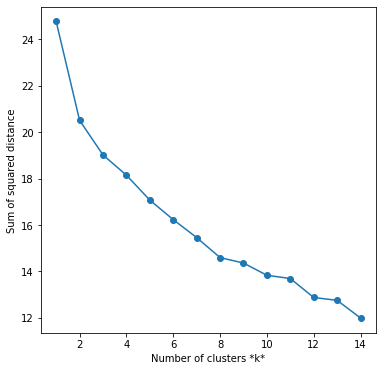

In [34]:
sse = []
list_k = list(range(1, 15))
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(toronto_grouped_clustering)
    sse.append(km.inertia_)
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Inertia value, or within-cluster sum-of-squares criterion is really similar between clusters, so the next simplification will be done in order to get better results.
* Remove all the neighborhoods which are farther to the new job neighborhood than the origin neighborhood
* Remove all the venues with a very small frequency

Calculate the number of locals per each Venue Category

In [35]:
Venues_sum=toronto_venues["Venue Category"].value_counts()
Venues_category= pd.DataFrame(data=Venues_sum.values, index= Venues_sum.index, columns=['Count']) 
Venues_category=Venues_category.reset_index()
Venues_category.rename({'index':'Venue Category'}, axis='columns',inplace=True)
Venues_category.set_index('Venue Category', inplace=True) 
Venues_category.head()

,Count
Venue Category,
Coffee Shop,206
Pizza Place,95
Café,87
Park,75
Bakery,70


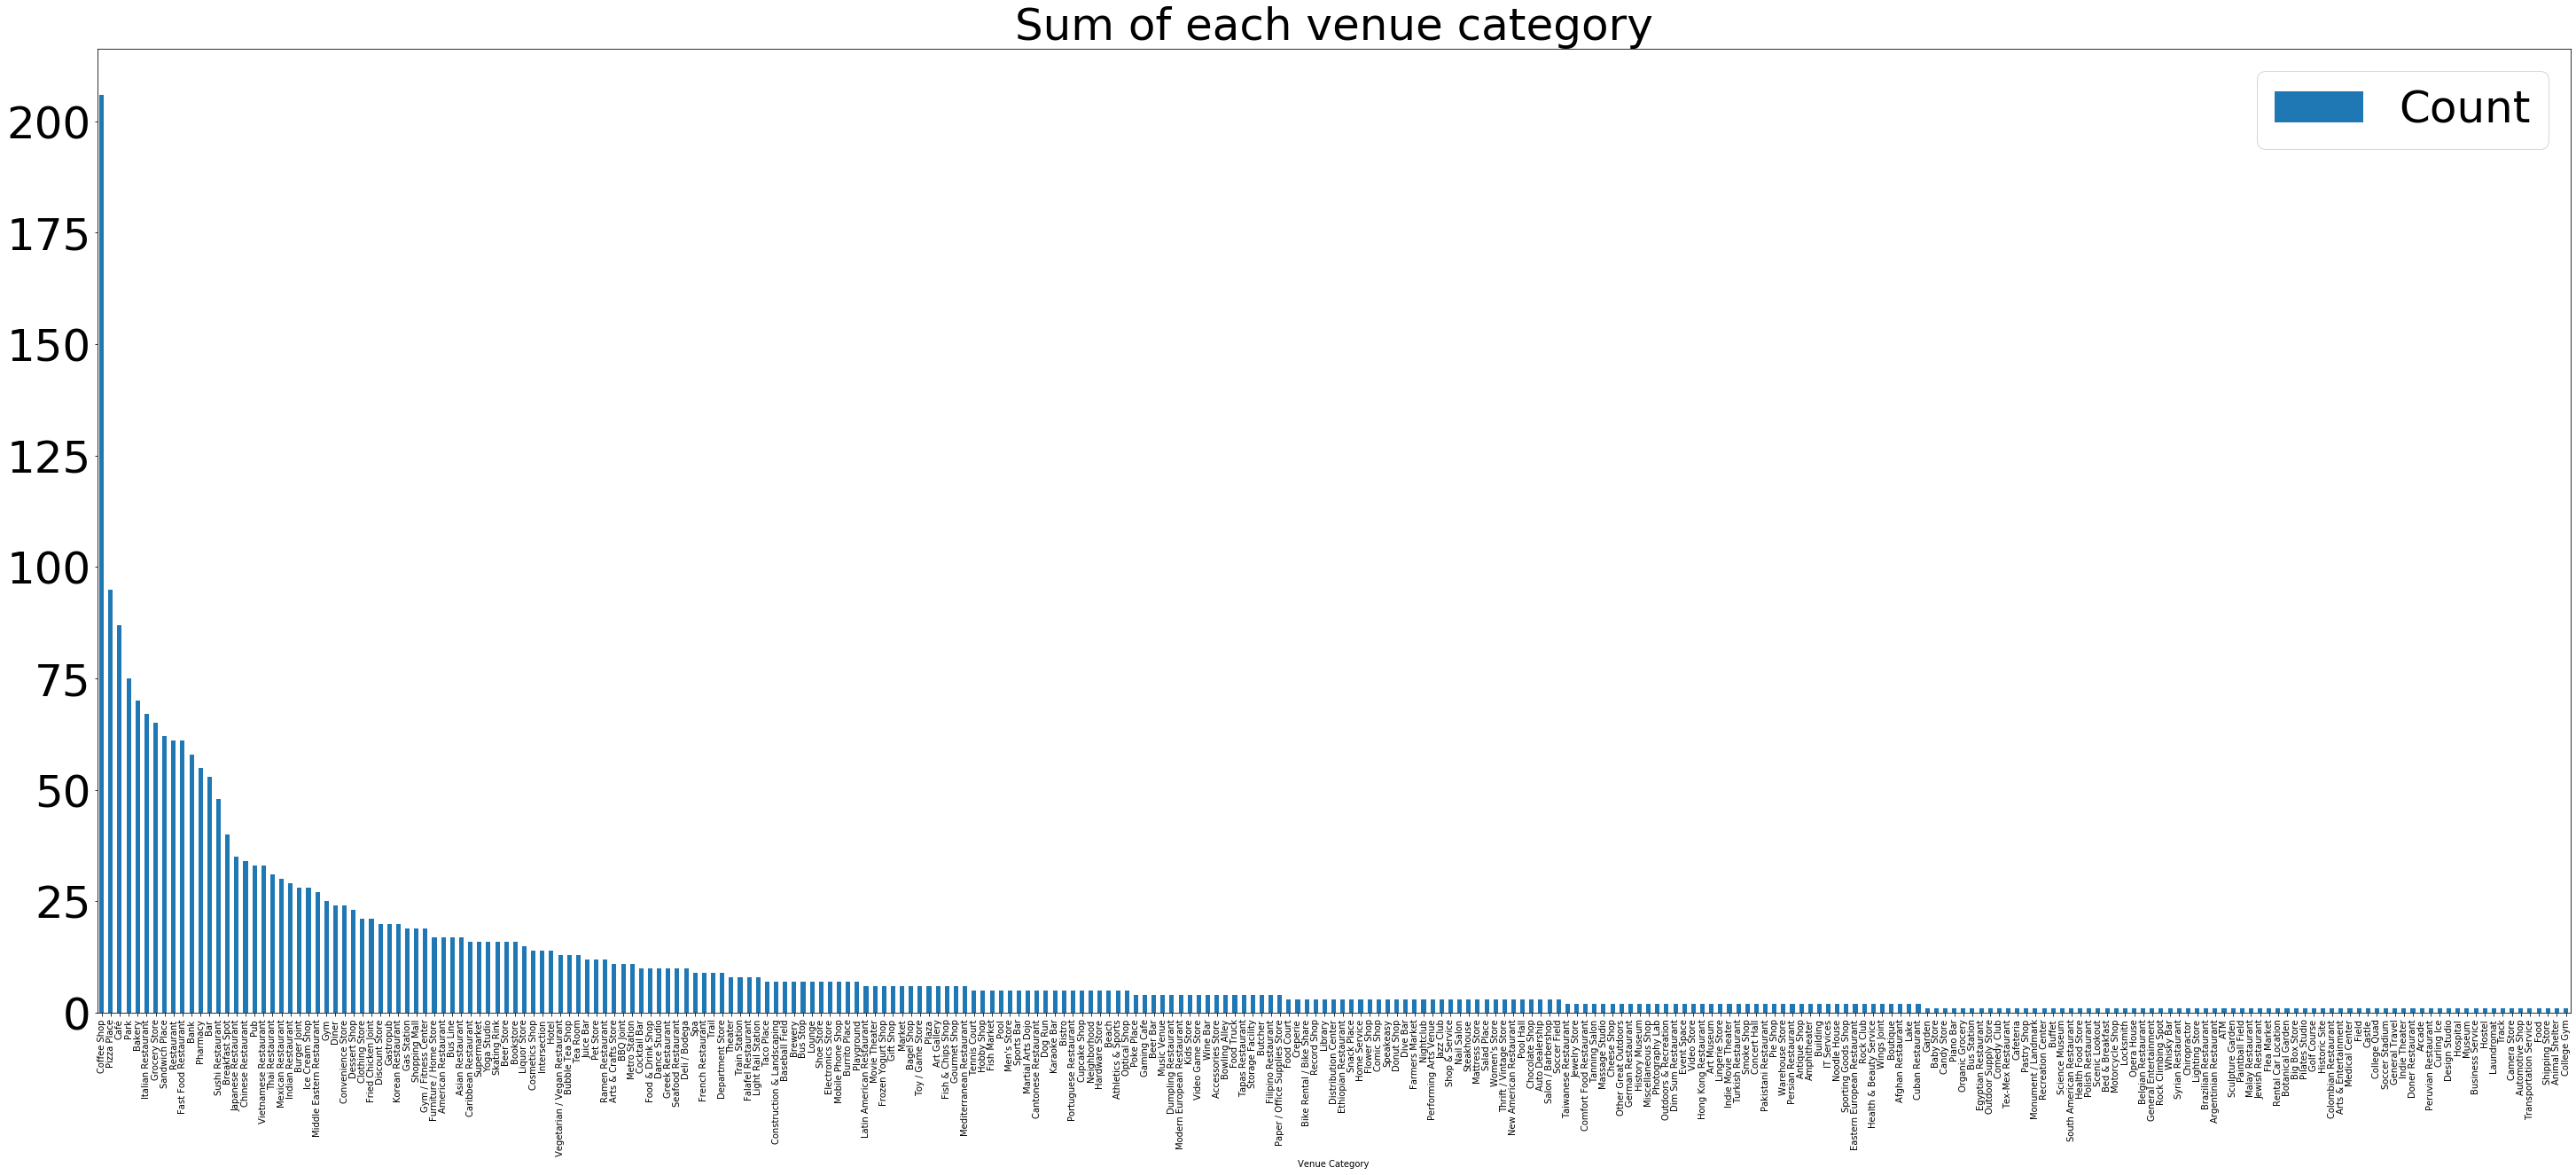

In [36]:
Venues_category.plot(kind='bar',figsize=(50, 20))
plt.title('Sum of each venue category', fontsize=50)
plt.legend(fontsize=50)
plt.yticks(fontsize=50)
plt.show()

Having in mind the graph below, remove all the Venue Categories which have less than 20 locals in all the newighborhoods (approximately the half of the category venues)

In [37]:
less_frequency_categories=Venues_category[Venues_category["Count"]<25].index.to_list()
less_frequency_categories

['Diner',
 'Convenience Store',
 'Dessert Shop',
 'Clothing Store',
 'Fried Chicken Joint',
 'Discount Store',
 'Gastropub',
 'Korean Restaurant',
 'Gas Station',
 'Shopping Mall',
 'Gym / Fitness Center',
 'Furniture / Home Store',
 'American Restaurant',
 'Bus Line',
 'Asian Restaurant',
 'Caribbean Restaurant',
 'Supermarket',
 'Yoga Studio',
 'Skating Rink',
 'Beer Store',
 'Bookstore',
 'Liquor Store',
 'Cosmetics Shop',
 'Intersection',
 'Hotel',
 'Vegetarian / Vegan Restaurant',
 'Bubble Tea Shop',
 'Tea Room',
 'Juice Bar',
 'Pet Store',
 'Ramen Restaurant',
 'Arts & Crafts Store',
 'BBQ Joint',
 'Metro Station',
 'Cocktail Bar',
 'Food & Drink Shop',
 'Dance Studio',
 'Greek Restaurant',
 'Seafood Restaurant',
 'Deli / Bodega',
 'Spa',
 'French Restaurant',
 'Trail',
 'Department Store',
 'Theater',
 'Train Station',
 'Falafel Restaurant',
 'Light Rail Station',
 'Taco Place',
 'Construction & Landscaping',
 'Baseball Field',
 'Brewery',
 'Bus Stop',
 'Lounge',
 'Shoe Store',


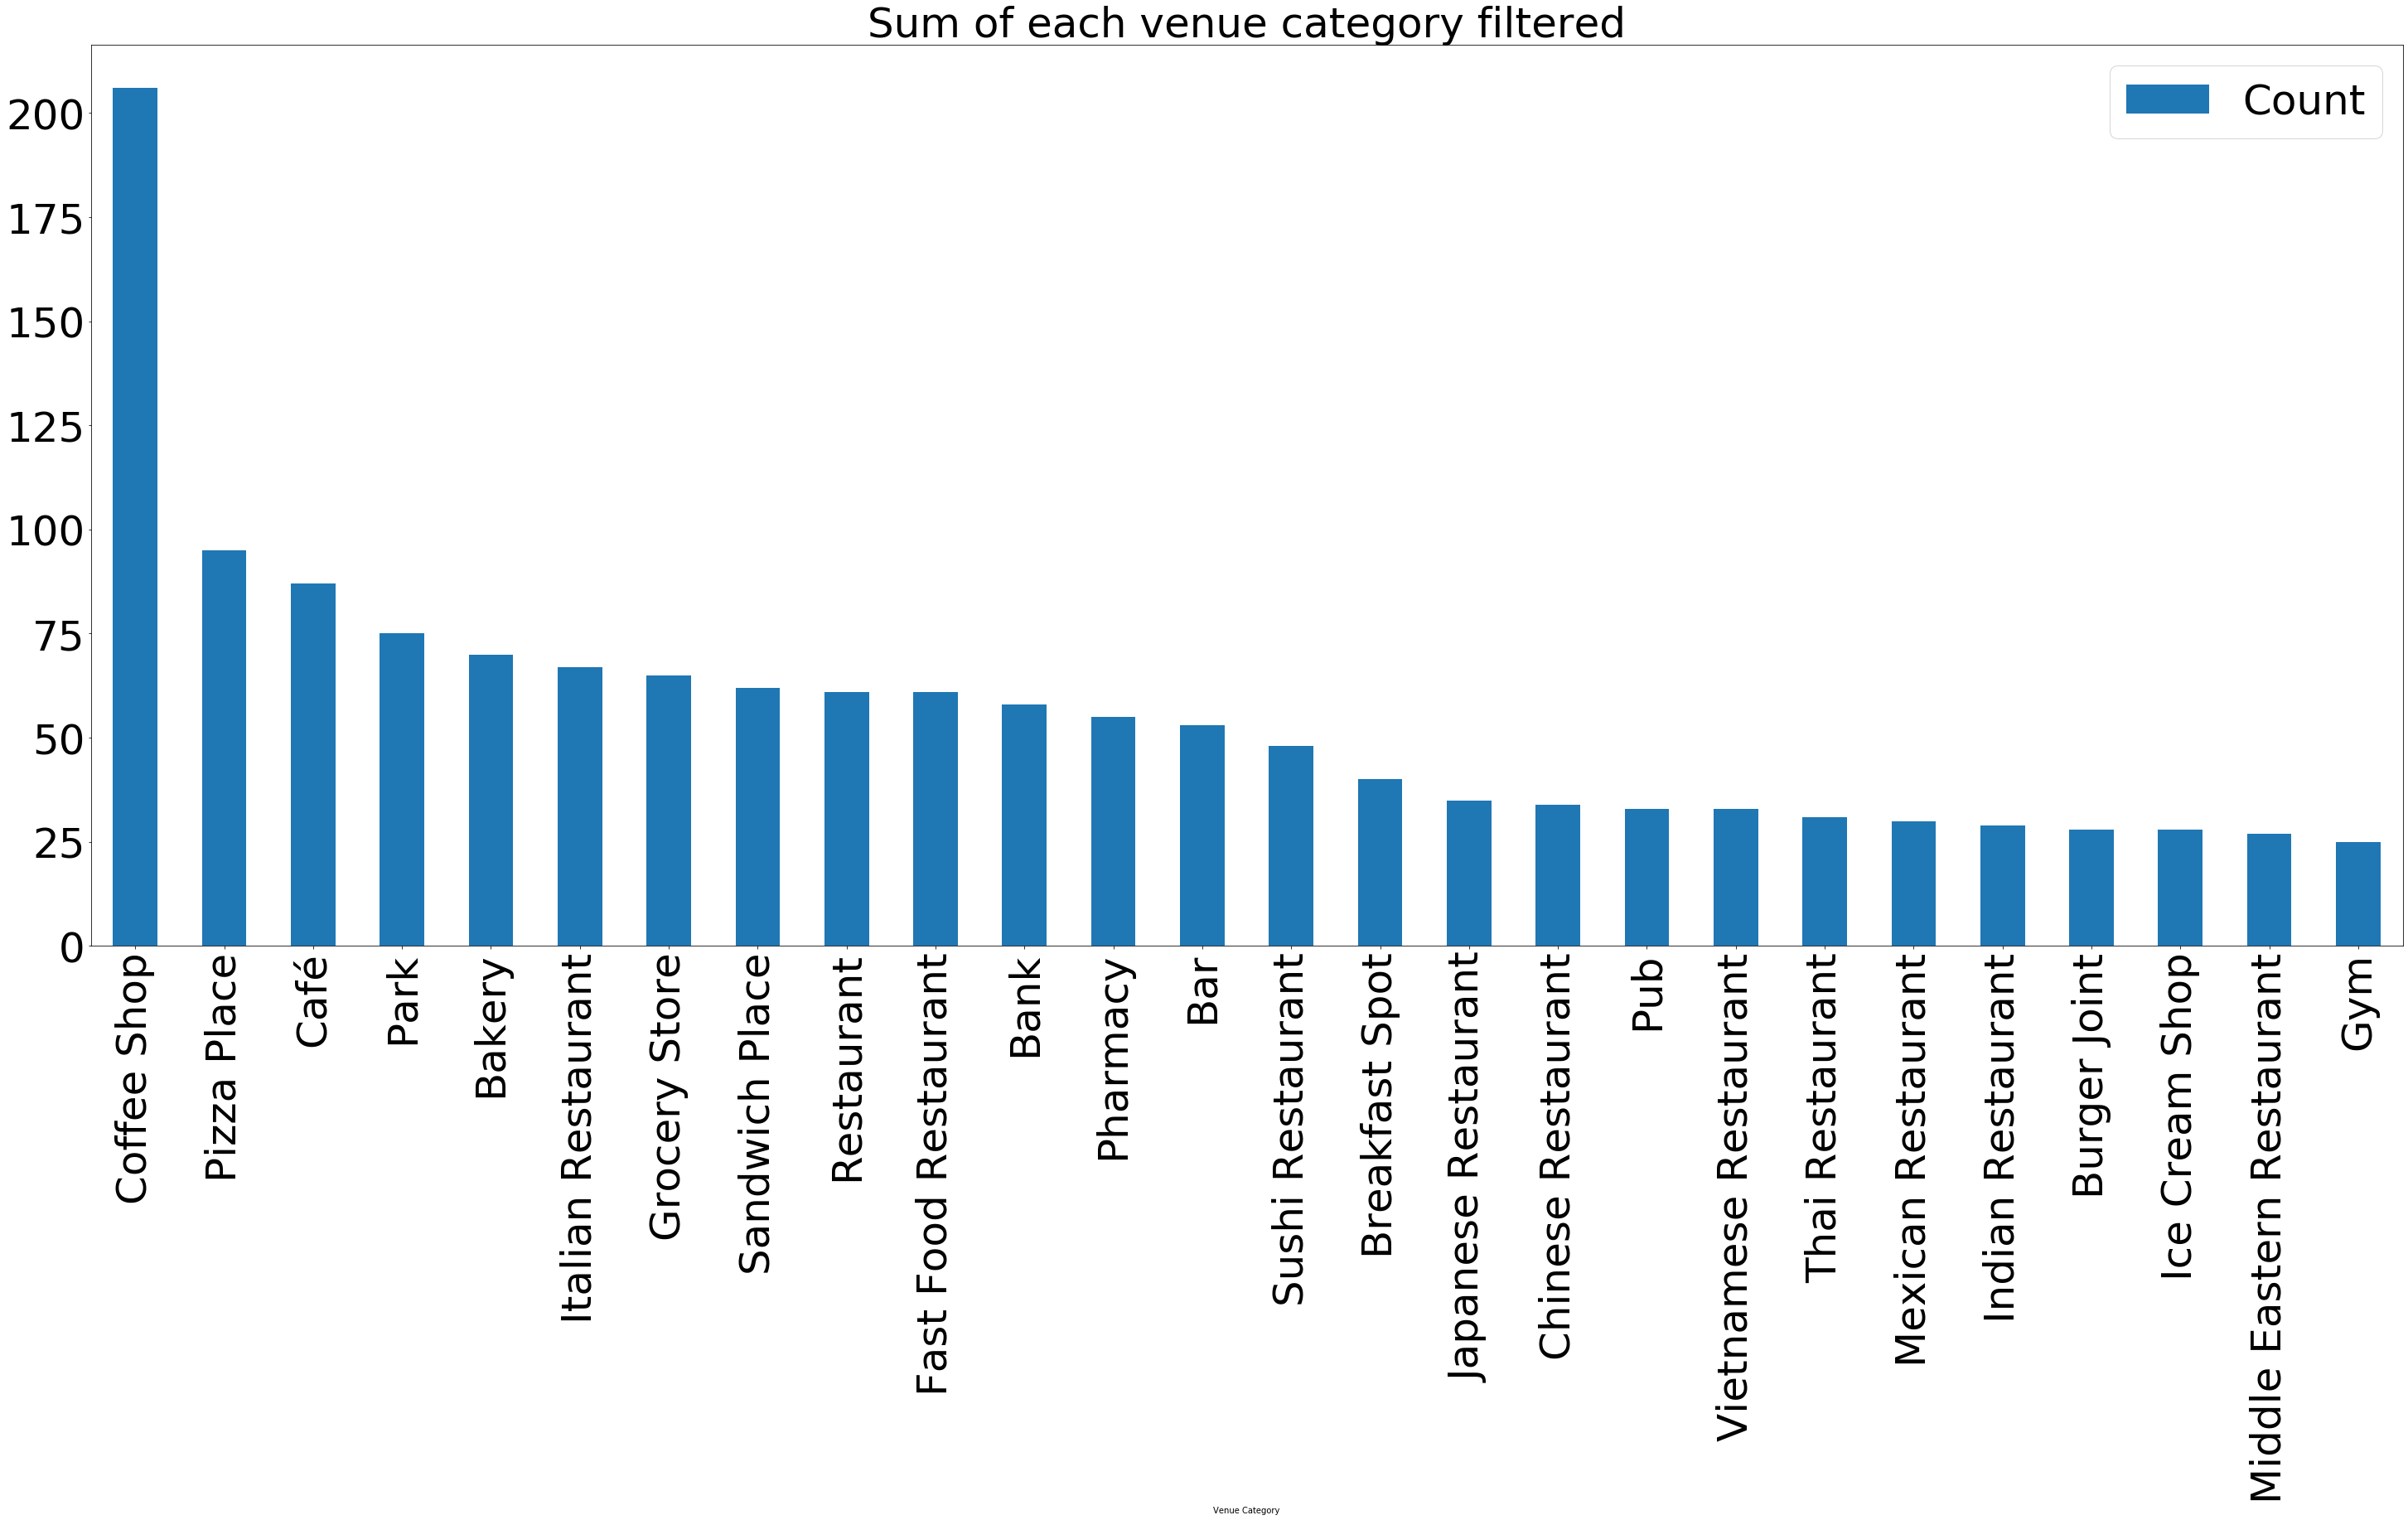

In [38]:
Venues_category_filt=Venues_category.copy()
Venues_category_filt.drop(less_frequency_categories,axis=0,inplace=True)
Venues_category_filt.plot(kind='bar',figsize=(50, 20))
plt.title('Sum of each venue category filtered', fontsize=50)
plt.legend(fontsize=50)
plt.yticks(fontsize=50)
plt.xticks(fontsize=50)
plt.show()

Remove the categories venues with lower frequency and group similar categories

In [39]:
toronto_onehot_filt["Coffee"]=toronto_onehot_filt["Coffee Shop"]+toronto_onehot_filt["Café"]+toronto_onehot_filt["Breakfast Spot"]
toronto_onehot_filt["Food Store"]=toronto_onehot_filt["Grocery Store"]+toronto_onehot_filt["Convenience Store"]
toronto_onehot_filt["Fast Food"]=toronto_onehot_filt["Sandwich Place"]+toronto_onehot_filt["Fast Food Restaurant"]+toronto_onehot_filt["Burger Joint"]+toronto_onehot_filt["Pizza Place"]
toronto_onehot_filt["Asiatic Restaurant"]=toronto_onehot_filt["Sushi Restaurant"]+toronto_onehot_filt["Vietnamese Restaurant"]+toronto_onehot_filt["Thai Restaurant"]+toronto_onehot_filt["Chinese Restaurant"]+toronto_onehot_filt["Japanese Restaurant"] 
toronto_onehot_filt['Bar-Pub']=toronto_onehot_filt['Pub']+toronto_onehot_filt['Bar']
toronto_onehot_filt['Oriental Restaurant']=toronto_onehot_filt['Indian Restaurant']+toronto_onehot_filt['Middle Eastern Restaurant']
toronto_onehot_filt.drop(["Coffee Shop","Café","Breakfast Spot","Grocery Store","Convenience Store","Sandwich Place","Fast Food Restaurant",
                         "Burger Joint","Pizza Place","Sushi Restaurant","Vietnamese Restaurant","Thai Restaurant","Chinese Restaurant",
                         "Japanese Restaurant",'Pub','Bar','Indian Restaurant','Middle Eastern Restaurant'],axis=1,inplace=True)

In [40]:
less_frequency_categories.remove("Neighborhood") #Remove from the list venue category "Neighborhood"
toronto_grouped = toronto_onehot_filt.groupby('Neighborhood').mean().reset_index()
#Ignore the errors because some columns are already drop in the first filter with remaining columns
toronto_grouped.drop(less_frequency_categories,axis=1,inplace=True,errors="ignore") 
toronto_grouped

,Neighborhood,Bakery,Bank,Gym,Ice Cream Shop,Italian Restaurant,Mexican Restaurant,Park,Pharmacy,Restaurant,Coffee,Food Store,Fast Food,Asiatic Restaurant,Bar-Pub,Oriental Restaurant
0,Agincourt North,0.068966,0.068966,0.000000,0.034483,0.000000,0.000000,0.000000,0.034483,0.034483,0.034483,0.034483,0.103448,0.137931,0.000000,0.034483
1,Agincourt South-Malvern West,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.066667,0.200000,0.000000,0.000000
2,Alderwood,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.375000,0.000000,0.125000,0.000000
3,Annex,0.023810,0.000000,0.023810,0.047619,0.000000,0.000000,0.047619,0.023810,0.000000,0.047619,0.047619,0.142857,0.071429,0.023810,0.071429
4,Banbury-Don Mills,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Wychwood,0.039216,0.019608,0.000000,0.058824,0.078431,0.019608,0.000000,0.019608,0.058824,0.098039,0.019608,0.098039,0.078431,0.019608,0.039216
135,Yonge-Eglinton,0.028571,0.014286,0.028571,0.014286,0.042857,0.014286,0.000000,0.014286,0.028571,0.142857,0.014286,0.028571,0.071429,0.057143,0.042857
136,Yonge-St.Clair,0.018519,0.037037,0.037037,0.000000,0.074074,0.000000,0.000000,0.018519,0.037037,0.166667,0.055556,0.092593,0.148148,0.037037,0.000000
137,York University Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.105263,0.263158,0.052632,0.000000,0.000000


Remove the Neighborhoods farther than the current Neighborhood

In [41]:
max_dist=geodesic(df_coordinates.loc['Guildwood'], df_coordinates.loc['Thistletown-Beaumond Heights']).meters,
df_coordinates_filt=df_coordinates[:]
for Nb in toronto_grouped.Neighborhood.to_list():
    dist=geodesic(df_coordinates.loc[Nb], df_coordinates.loc['Guildwood']).meters
    if dist>max_dist[0]:
        print(Nb)
        toronto_grouped=toronto_grouped[toronto_grouped["Neighborhood"]!=Nb]
        df_coordinates_filt.drop(Nb,axis=0,inplace=True)
toronto_grouped

Alderwood
Etobicoke West Mall
Humber Summit
Islington-City Centre West
Kingsview Village-The Westway
Long Branch
Markland Wood
New Toronto
Rexdale-Kipling
Stonegate-Queensway
Willowridge-Martingrove-Richview


D:\Programas\Conda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Neighborhood,Bakery,Bank,Gym,Ice Cream Shop,Italian Restaurant,Mexican Restaurant,Park,Pharmacy,Restaurant,Coffee,Food Store,Fast Food,Asiatic Restaurant,Bar-Pub,Oriental Restaurant
0,Agincourt North,0.068966,0.068966,0.000000,0.034483,0.000000,0.000000,0.000000,0.034483,0.034483,0.034483,0.034483,0.103448,0.137931,0.000000,0.034483
1,Agincourt South-Malvern West,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.066667,0.200000,0.000000,0.000000
3,Annex,0.023810,0.000000,0.023810,0.047619,0.000000,0.000000,0.047619,0.023810,0.000000,0.047619,0.047619,0.142857,0.071429,0.023810,0.071429
4,Banbury-Don Mills,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Bathurst Manor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Wychwood,0.039216,0.019608,0.000000,0.058824,0.078431,0.019608,0.000000,0.019608,0.058824,0.098039,0.019608,0.098039,0.078431,0.019608,0.039216
135,Yonge-Eglinton,0.028571,0.014286,0.028571,0.014286,0.042857,0.014286,0.000000,0.014286,0.028571,0.142857,0.014286,0.028571,0.071429,0.057143,0.042857
136,Yonge-St.Clair,0.018519,0.037037,0.037037,0.000000,0.074074,0.000000,0.000000,0.018519,0.037037,0.166667,0.055556,0.092593,0.148148,0.037037,0.000000
137,York University Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.105263,0.263158,0.052632,0.000000,0.000000


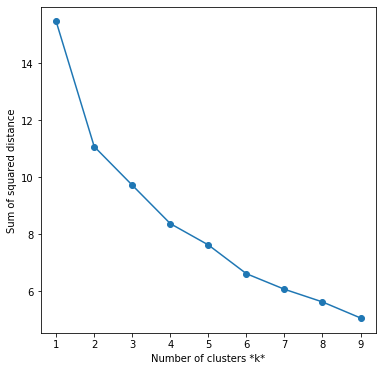

In [42]:
sse = []
list_k = list(range(1, 10))
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(toronto_grouped_clustering)
    sse.append(km.inertia_)
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Having in mind the curve, the most optimal value is k=4

In [43]:
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# add clustering labels
toronto_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [44]:
toronto_merged = df_coordinates_filt
# merge to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_grouped.set_index('Neighborhood'), on='Neighborhood')
toronto_merged["Cluster Labels"]=toronto_merged['Cluster Labels']
#Remove Neighborhoods with no cluster due to lack of categories for the filtering
toronto_merged.dropna(subset=["Cluster Labels"],axis=0,inplace=True) 
toronto_merged["Cluster Labels"]=toronto_merged["Cluster Labels"].astype(int)
toronto_merged

,Latitude,Longitude,Cluster Labels,Bakery,Bank,Gym,Ice Cream Shop,Italian Restaurant,Mexican Restaurant,Park,Pharmacy,Restaurant,Coffee,Food Store,Fast Food,Asiatic Restaurant,Bar-Pub,Oriental Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,
Agincourt North,43.808,-79.2664,0,0.068966,0.068966,0.000000,0.034483,0.000000,0.000000,0.000000,0.034483,0.034483,0.034483,0.034483,0.103448,0.137931,0.000000,0.034483
Agincourt South-Malvern West,43.7892,-79.263,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.066667,0.200000,0.000000,0.000000
Annex,43.6703,-79.4071,0,0.023810,0.000000,0.023810,0.047619,0.000000,0.000000,0.047619,0.023810,0.000000,0.047619,0.047619,0.142857,0.071429,0.023810,0.071429
Banbury-Don Mills,43.7348,-79.3572,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
Bathurst Manor,43.7639,-79.4564,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,43.6821,-79.424,0,0.039216,0.019608,0.000000,0.058824,0.078431,0.019608,0.000000,0.019608,0.058824,0.098039,0.019608,0.098039,0.078431,0.019608,0.039216
Yonge-Eglinton,43.7067,-79.3983,0,0.028571,0.014286,0.028571,0.014286,0.042857,0.014286,0.000000,0.014286,0.028571,0.142857,0.014286,0.028571,0.071429,0.057143,0.042857
Yonge-St.Clair,43.6881,-79.3944,0,0.018519,0.037037,0.037037,0.000000,0.074074,0.000000,0.000000,0.018519,0.037037,0.166667,0.055556,0.092593,0.148148,0.037037,0.000000


In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged.index.values, toronto_merged['Cluster Labels']):
    label = folium.Popup((poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)

In [46]:
map_clusters

## 3.2. Criminality per Neighborhood

Create a new column with the sum of all the crimes

In [47]:
df_crimeperpop2019["Total"]=df_crimeperpop2019.sum(axis=1)
df_crimeperpop2019.head()

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total
Neighbourhood,,,,,,
Agincourt North,2.713564,1.442654,1.923539,1.202212,0.068698,7.350668
Agincourt South-Malvern West,5.177421,2.609757,4.209286,1.220693,0.631393,13.848550
Alderwood,2.986560,1.161440,2.156960,0.414800,0.580720,7.300481
Annex,9.434580,0.982769,6.944899,1.015528,1.375876,19.753653
Banbury-Don Mills,2.671962,1.516519,2.924716,0.361076,0.505506,7.979780


Create a bubble plot over the map

In [48]:
Crime_for_bubble="Total"
norm_crime = (df_crimeperpop2019[Crime_for_bubble] - df_crimeperpop2019[Crime_for_bubble].min()) / (df_crimeperpop2019[Crime_for_bubble].max() - df_crimeperpop2019[Crime_for_bubble].min())
# create map
dfcrime_bubble=df_coordinates
dfcrime_bubble=dfcrime_bubble.join(df_crimeperpop2019[Crime_for_bubble], on='Neighborhood')

In [49]:
map_crime = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng,label in zip(dfcrime_bubble['Latitude'], dfcrime_bubble['Longitude'], dfcrime_bubble.index.values):    
        radius_norm=norm_crime[label]
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=radius_norm*50,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_crime)
map_crime

Box plot for each kind of crime

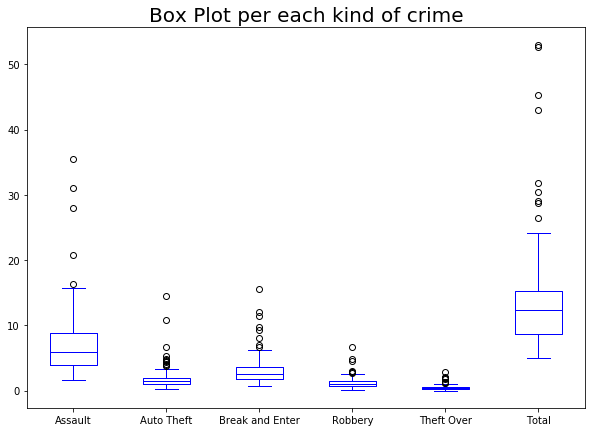

In [50]:
df_crimeperpop2019.plot(kind='box', figsize=(10, 7), color='blue') 
plt.title('Box Plot per each kind of crime', fontsize=20)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

Check the number of crimes for all the city

In [51]:
df_crimetotal=pd.DataFrame(columns=[ 'Assault', 'Auto Theft','Break and Enter', 'Robbery', 'Theft Over']) 
df_crimetotal=df_crimetotal.append({'Assault': df_crimeperpop2019['Assault'].sum(),
                        'Auto Theft':df_crimeperpop2019['Auto Theft'].sum(),
                        'Break and Enter':df_crimeperpop2019['Break and Enter'].sum(),
                        'Robbery':df_crimeperpop2019['Robbery'].sum(),
                        'Theft Over':df_crimeperpop2019['Theft Over'].sum()},ignore_index=True)
df_crimetotal

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,1000.085871,259.79502,427.769436,171.941943,65.980999


Top 10 most insecure Neighborhoods

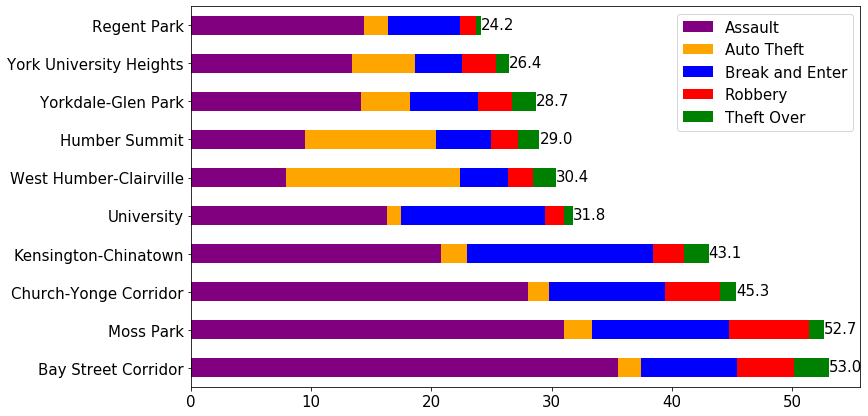

In [52]:
df_top10=df_crimeperpop2019.sort_values(by=['Total'],ascending=False).head(10)
df_t10_Total=df_top10["Total"]
df_top10.drop("Total",axis=1,inplace=True)
df_top10.plot(kind='barh', figsize=(12, 7), color=['purple','orange','blue','red','green'],stacked=True)
plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('')

for index, value in enumerate(df_t10_Total):
    plt.annotate(round(value,1), xy=(value , index - 0.1), color='black', fontsize=15)
plt.show()

Top 10 most secure Neighborhoods

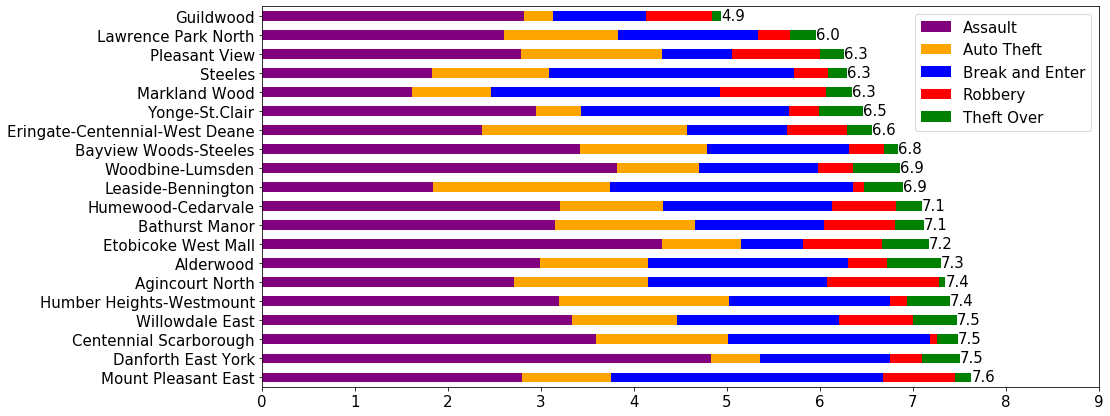

In [53]:
df_less10=df_crimeperpop2019.sort_values(by=['Total'],ascending=False).tail(20)
df_l10_Total=df_less10["Total"]
df_less10.drop("Total",axis=1,inplace=True)
df_less10.plot(kind='barh', figsize=(15, 7), color=['purple','orange','blue','red','green'],stacked=True, xlim=(0,9))
plt.legend(fontsize=15,loc='upper right')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('')

for index, value in enumerate(df_l10_Total):
    plt.annotate(round(value,1), xy=(value , index - 0.2), color='black', fontsize=15)
plt.show()

## 3.3 Neighborhood Profiles

Here we have three kind of data:
* Age and Dwelling Characteristics
* Income
* Immigration

So starting with **Age and Dwelling Characteristics**, below the percentage of population living alone per Neighborhood with less than 65 years. This data is not available, but it can be obtained with other data: total population living alone, total population living alone with more than 65 years and total population. 

In [54]:
df_livingalone=df_profile.loc[[('Population and dwellings', 'Population, 2016'), ('Family characteristics of adults', 'Persons living alone (total)'),('Family characteristics of adults', 
'Persons age 65+ living alone (total)')]].apply(lambda x: pd.to_numeric(x.str.replace(',','')))
Neighborhoods=df_livingalone.columns.to_list()
df_livingalone.drop(['City of Toronto'],axis=1,inplace=True)
#Reset the index to remove the multi-index
df_livingalone.reset_index(drop=True, inplace=True)
df_livingalone=df_livingalone.T
#Rename index and columns
df_livingalone.rename(columns={0 : 'Population', 1: 'Persons living alone (total)',
                               2: 'Persons age 65+ living alone (total)' }, inplace=True) 
df_livingalone.index.name = "Neighborhood"
df_livingalone

,Population,Persons living alone (total),Persons age 65+ living alone (total)
Neighborhood,,,
Agincourt North,29113,1355,795
Agincourt South-Malvern West,23757,1625,520
Alderwood,12054,1105,440
Annex,30526,7880,1765
Banbury-Don Mills,27695,4360,1990
...,...,...,...
Wychwood,14349,2070,690
Yonge-Eglinton,11817,2370,595
Yonge-St.Clair,12528,3475,1025


In [55]:
df_livingalone['Liv. alone age less than 65 (percentage)']=(df_livingalone['Persons living alone (total)']-df_livingalone['Persons age 65+ living alone (total)'])/df_livingalone['Population']*100
df_livingalone['Liv. alone age less than 65 (percentage)'].to_frame().sort_values(by=['Liv. alone age less than 65 (percentage)'], ascending=False).head(10)

,Liv. alone age less than 65 (percentage)
Neighborhood,
Church-Yonge Corridor,31.716656
Waterfront Communities-The Island,30.714730
Niagara,30.676716
Moss Park,29.308495
Bay Street Corridor,25.448696
Mount Pleasant West,25.355722
South Parkdale,22.037622
Cabbagetown-South St. James Town,20.353072
Annex,20.032104


Display results over a map based on the percentiles

In [56]:
df_livingalone=df_livingalone.join(df_coordinates, on='Neighborhood')

In [57]:
df_livingalone['color']=['red' if x < df_livingalone['Liv. alone age less than 65 (percentage)'].quantile(0.50)
                         else 'green' for x in df_livingalone['Liv. alone age less than 65 (percentage)']] 


In [58]:
map_alone = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng,label,d_color in zip(df_livingalone['Latitude'], df_livingalone['Longitude'], df_livingalone.index.values,df_livingalone['color']): 
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=d_color,
            fill=True,
            fill_color='',
            fill_opacity=0.7,
            parse_html=False).add_to(map_alone)
map_alone

Next data is **income of the population**. Here the idea is displaying the most frequent category between three categories: income less than 19,999, income between 20,000 and 49,999 and income more than 50,000



In [59]:
df_income=df_profile.iloc[988:997]
df_income.drop(['City of Toronto'],axis=1,inplace=True)
#Reset the index to remove the multi-index
df_income.reset_index(drop=True, inplace=True)
df_income=df_income.T
#Convert to number
df_income=df_income.apply(lambda x: pd.to_numeric(x.str.replace(',','')))
df_income["Below 19,999"]=df_income[0]+df_income[1]
df_income["Between 20,000 and 49,999"]=df_income[2]+df_income[3]+df_income[4]
df_income["Over 50,000"]=df_income[5]+df_income[6]+df_income[7]+df_income[8]
df_income.drop([0,1,2,3,4,5,6,7,8],axis=1,inplace=True)
df_income['HighScore'] = df_income[['Below 19,999','Between 20,000 and 49,999',"Over 50,000"]].idxmax(axis=1)
df_income.index.name = "Neighborhood"
df_income=df_income.join(df_coordinates, on='Neighborhood')
df_income

D:\Programas\Conda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,"Below 19,999","Between 20,000 and 49,999","Over 50,000",HighScore,Latitude,Longitude
Neighborhood,,,,,,
Agincourt North,11700,8730,3210,"Below 19,999",43.808,-79.2664
Agincourt South-Malvern West,9230,7010,3055,"Below 19,999",43.7892,-79.263
Alderwood,2960,4085,2895,"Between 20,000 and 49,999",43.6017,-79.5452
Annex,7785,7915,9975,"Over 50,000",43.6703,-79.4071
Banbury-Don Mills,6585,7535,8265,"Over 50,000",43.7348,-79.3572
...,...,...,...,...,...,...
Wychwood,3840,3995,3170,"Between 20,000 and 49,999",43.6821,-79.424
Yonge-Eglinton,2460,3090,4045,"Over 50,000",43.7067,-79.3983
Yonge-St.Clair,2460,3435,5020,"Over 50,000",43.6881,-79.3944


Representation in map of the most frequent category

In [60]:
map_income = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng,label,highscore in zip(df_income['Latitude'], df_income['Longitude'], df_income.index.values,df_income['HighScore']): 
        if highscore=="Below 19,999":
            income_color="red"  
        elif highscore=="Between 20,000 and 49,999":
            income_color="yellow"  
        else:
            income_color="green"    
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=income_color,
            fill=True,
            fill_color='',
            fill_opacity=0.7,
            parse_html=False).add_to(map_income)
map_income

Last data is Immigration, where European immigration is going to be the main subject. 

In [61]:
toronto_inmigration=df_profile.loc[[('Immigrants by selected place of birth','  Europe'),('Immigrants by selected place of birth','  Asia'),
                         ('Immigrants by selected place of birth','  Americas'),('Immigrants by selected place of birth','  Africa'),
                         ('Immigrants by selected place of birth','  Oceania and other places of birth')]].apply(lambda x: pd.to_numeric(x.str.replace(',','')))
toronto_inmigration.sort_values(['Thistletown-Beaumond Heights'],ascending=False, axis=0, inplace=True) 
toronto_inmigration.drop("City of Toronto",axis=1,inplace=True)
toronto_inmigration=toronto_inmigration.astype(int)
toronto_inmigration.reset_index(level=0,inplace=True,drop=True)
toronto_inmigration=toronto_inmigration.T
toronto_inmigration.index.name = "Neighborhood"
toronto_inmigration.columns.name=""
#Immigration per 1000 habitants of the Neighborhood
toronto_inmigration.rename(columns={'  Oceania and other places of birth' : "Oceania"}, inplace=True) 
toronto_inmigration[['  Asia', '  Americas', '  Europe', '  Africa', 'Oceania']]=toronto_inmigration[['  Asia',
    '  Americas', '  Europe', '  Africa', 'Oceania']].div(df_population.Population, axis=0)*1000
toronto_inmigration

,Asia,Americas,Europe,Africa,Oceania
Neighborhood,,,,,
Agincourt North,591.488339,56.160478,23.185518,15.285268,0.686978
Agincourt South-Malvern West,515.216568,59.561392,45.249821,14.732500,0.000000
Alderwood,85.863614,37.332006,197.444832,8.296001,0.829600
Annex,99.751032,53.397104,94.837188,20.310555,2.784512
Banbury-Don Mills,261.960643,48.203647,126.196064,38.635133,1.624842
...,...,...,...,...,...
Wychwood,85.371803,66.903617,134.852603,14.286710,2.090738
Yonge-Eglinton,117.627147,49.081831,90.124397,11.001100,0.846238
Yonge-St.Clair,95.386335,55.475734,113.346105,19.955300,2.394636


Box plot per each Continent

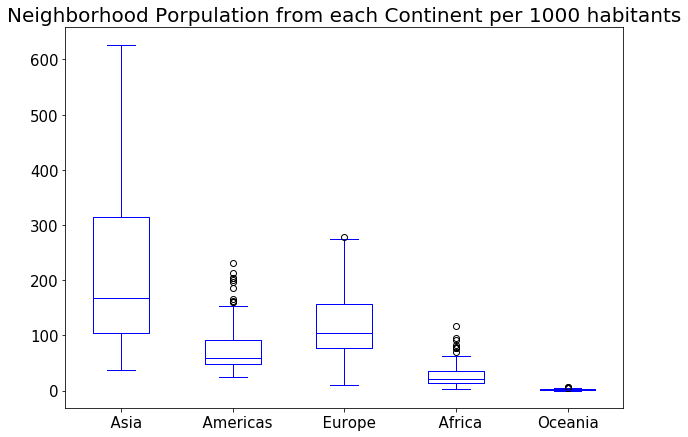

In [62]:
toronto_inmigration.plot(kind='box', figsize=(10, 7), color='blue')
plt.title('Neighborhood Porpulation from each Continent per 1000 habitants',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

As we can see in the plot below, the Distribution of European population for all the neighborhoods is not constant in all the Neighborhoods. 

Text(0, 0.5, '')

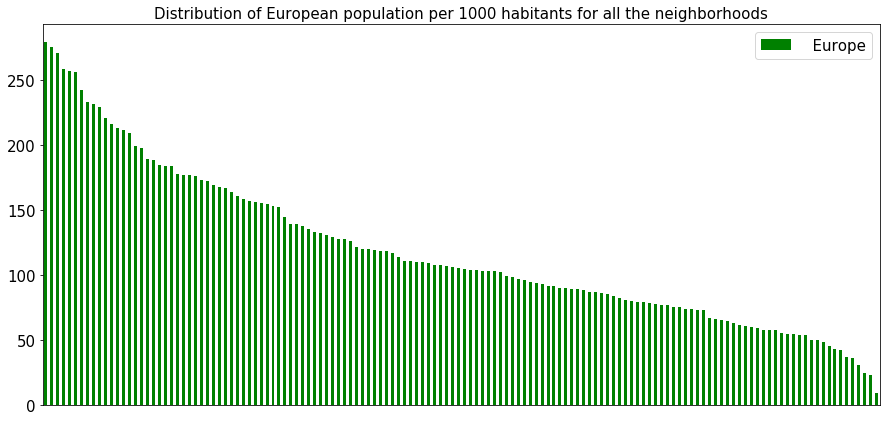

In [63]:
toronto_inmigration.sort_values(by=['  Europe'],ascending=False)["  Europe"].plot(kind='bar', figsize=(15, 7), color=['green'])
plt.legend(fontsize=15,loc='upper right')
plt.title("Distribution of European population per 1000 habitants for all the neighborhoods",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks([])
plt.xlabel('') 
plt.ylabel('')


Map with the neighborhoods inside of the percentile 75 of more European population per 1000 habitants. 

In [64]:
toronto_inmigration=toronto_inmigration.join(df_coordinates, on='Neighborhood')

In [65]:
df_topEurope=toronto_inmigration[toronto_inmigration['  Europe']>toronto_inmigration['  Europe'].quantile(0.50)]
map_europe = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng,label in zip(df_topEurope['Latitude'], df_topEurope['Longitude'], df_topEurope.index.values):   
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color="blue",
            fill=True,
            fill_color='',
            fill_opacity=0.7,
            parse_html=False).add_to(map_europe )
map_europe 

# 4.Results

Merging all the data, we have the following: 

* Cluster 0 is composed for the neighborhoods more similar to subject's neighborhood
* The neighborhoods with more crimes are specially in the center of Toronto, maybe due to the concentration of tourism and other commercial activities. Besides the northwest has a big concentration of crimes. 
* There is more concentration of people living alone with age less than 65 years in the center and area close to the bay. 
* There is a mix between different cluster per income along all the city, so the wealth is distributed
* The European population lives more in the west area of the city. 


The next step is merge all the interesting criteria in the same table in order to understand the neighborhood which fits all the criteria

In [66]:
Best_fit=pd.merge(toronto_merged[toronto_merged['Cluster Labels']==0],dfcrime_bubble[dfcrime_bubble['Total']>dfcrime_bubble['Total'].quantile(0.50)],how="inner",on="Neighborhood")
Best_fit=pd.merge(Best_fit,df_livingalone[df_livingalone['Liv. alone age less than 65 (percentage)']>df_livingalone['Liv. alone age less than 65 (percentage)'].quantile(0.5)],how="inner", on="Neighborhood")
Best_fit=pd.merge(Best_fit,df_income[(df_income["HighScore"]=="Between 20,000 and 49,999")|(df_income["HighScore"]=="Over 50,000")],how="inner", on="Neighborhood")
Best_fit=pd.merge(Best_fit,df_topEurope,how="inner", on="Neighborhood")
Best_fit.drop(["Latitude_y",'Longitude_y',"HighScore","Cluster Labels",
               "Persons age 65+ living alone (total)"],axis=1,inplace=True)
Best_fit.rename(columns={"Total":"Crimes per 1000","Latitude_x":"Latitude","Longitude_x":"Longitude"},inplace=True)
Best_fit=Best_fit.loc[:,~Best_fit.columns.duplicated()]
Best_fit

,Latitude,Longitude,Bakery,Bank,Gym,Ice Cream Shop,Italian Restaurant,Mexican Restaurant,Park,Pharmacy,...,Liv. alone age less than 65 (percentage),color,"Below 19,999","Between 20,000 and 49,999","Over 50,000",Asia,Americas,Europe,Africa,Oceania
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Briar Hill-Belgravia,43.7007,-79.4482,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,...,8.066213,green,4495,5285,1990,234.972294,113.628393,233.218770,17.535246,0.000000
Cabbagetown-South St. James Town,43.6677,-79.3699,0.061224,0.020408,0.000000,0.000000,0.040816,0.000000,0.020408,0.020408,...,20.353072,green,3175,3335,3470,126.831777,68.129231,110.549319,15.853972,1.285457
Dovercourt-Wallace Emerson-Junction,43.6624,-79.4465,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.062500,...,10.279863,green,11555,12305,6920,125.733788,69.624573,177.201365,17.883959,1.774744
Dufferin Grove,43.6536,-79.4264,0.039216,0.000000,0.000000,0.000000,0.098039,0.039216,0.000000,0.000000,...,13.831141,green,3645,4155,2325,109.036911,73.398388,176.495545,13.576580,0.848536
Junction Area,43.6655,-79.4704,0.038462,0.000000,0.019231,0.019231,0.076923,0.057692,0.000000,0.000000,...,11.067799,green,3760,4300,3505,114.158430,59.515523,129.124321,11.485452,2.088264
Mimico (includes Humber Bay Shores),43.6146,-79.4957,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.578495,green,8770,10445,9735,132.934872,63.743964,176.363208,20.610058,1.619362
Oakwood Village,43.6827,-79.4381,0.043478,0.000000,0.000000,0.000000,0.043478,0.086957,0.000000,0.000000,...,7.190005,green,6545,6985,3560,139.321075,130.834512,172.324375,26.638378,0.471476
Palmerston-Little Italy,43.6555,-79.41,0.014925,0.000000,0.000000,0.000000,0.059701,0.000000,0.000000,0.000000,...,12.765804,green,4025,4750,3450,83.176624,48.821062,152.972660,10.125850,1.446550
Playter Estates-Danforth,43.6864,-79.3004,0.038462,0.038462,0.000000,0.000000,0.000000,0.038462,0.000000,0.076923,...,13.582778,green,1910,2015,2370,63.429011,43.567401,107.637109,11.532547,3.844182


In [67]:
map_bestfit = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng,label in zip(Best_fit['Latitude'], Best_fit['Longitude'], Best_fit.index.values):   
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color="blue",
            fill=True,
            fill_color='',
            fill_opacity=0.7,
            parse_html=False).add_to(map_bestfit )
map_bestfit

In [68]:
Best_fit.columns.values

array(['Latitude', 'Longitude', 'Bakery', 'Bank', 'Gym', 'Ice Cream Shop',
       'Italian Restaurant', 'Mexican Restaurant', 'Park', 'Pharmacy',
       'Restaurant', 'Coffee', 'Food Store', 'Fast Food',
       'Asiatic Restaurant', 'Bar-Pub', 'Oriental Restaurant',
       'Crimes per 1000', 'Population', 'Persons living alone (total)',
       'Liv. alone age less than 65 (percentage)', 'color',
       'Below 19,999', 'Between 20,000 and 49,999', 'Over 50,000',
       '  Asia', '  Americas', '  Europe', '  Africa', 'Oceania'],
      dtype=object)

**Category Venues**

In [69]:
Best_fit[['Bakery', 'Bank', 'Gym', 'Ice Cream Shop',
       'Italian Restaurant', 'Mexican Restaurant', 'Park', 'Pharmacy',
       'Restaurant', 'Coffee', 'Food Store', 'Fast Food',
       'Asiatic Restaurant', 'Bar-Pub', 'Oriental Restaurant']]

,Bakery,Bank,Gym,Ice Cream Shop,Italian Restaurant,Mexican Restaurant,Park,Pharmacy,Restaurant,Coffee,Food Store,Fast Food,Asiatic Restaurant,Bar-Pub,Oriental Restaurant
Neighborhood,,,,,,,,,,,,,,,
Briar Hill-Belgravia,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.285714,0.000000,0.142857,0.000000,0.000000,0.000000
Cabbagetown-South St. James Town,0.061224,0.020408,0.000000,0.000000,0.040816,0.000000,0.020408,0.020408,0.061224,0.163265,0.040816,0.081633,0.081633,0.040816,0.020408
Dovercourt-Wallace Emerson-Junction,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.062500,0.000000,0.375000,0.062500,0.000000,0.000000,0.000000,0.000000
Dufferin Grove,0.039216,0.000000,0.000000,0.000000,0.098039,0.039216,0.000000,0.000000,0.078431,0.196078,0.000000,0.019608,0.019608,0.137255,0.000000
Junction Area,0.038462,0.000000,0.019231,0.019231,0.076923,0.057692,0.000000,0.000000,0.000000,0.153846,0.057692,0.019231,0.096154,0.057692,0.019231
Mimico (includes Humber Bay Shores),0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.428571,0.000000,0.000000,0.142857,0.000000
Oakwood Village,0.043478,0.000000,0.000000,0.000000,0.043478,0.086957,0.000000,0.000000,0.000000,0.086957,0.043478,0.130435,0.043478,0.000000,0.000000
Palmerston-Little Italy,0.014925,0.000000,0.000000,0.000000,0.059701,0.000000,0.000000,0.000000,0.014925,0.089552,0.000000,0.059701,0.044776,0.164179,0.014925
Playter Estates-Danforth,0.038462,0.038462,0.000000,0.000000,0.000000,0.038462,0.000000,0.076923,0.000000,0.153846,0.076923,0.038462,0.038462,0.000000,0.076923


**Crimes and population**

In [70]:
Best_fit[['Population', 'Crimes per 1000', 'Persons living alone (total)',
       'Liv. alone age less than 65 (percentage)']]

,Population,Crimes per 1000,Persons living alone (total),Liv. alone age less than 65 (percentage)
Neighborhood,,,,
Briar Hill-Belgravia,14257,12.765659,1725,8.066213
Cabbagetown-South St. James Town,11669,23.738110,3315,20.353072
Dovercourt-Wallace Emerson-Junction,36625,14.962457,4655,10.279863
Dufferin Grove,11785,15.528214,2020,13.831141
Junction Area,14366,12.529584,1985,11.067799
Mimico (includes Humber Bay Shores),33964,14.662584,8205,18.578495
Oakwood Village,21210,13.342763,2650,7.190005
Palmerston-Little Italy,13826,13.742225,2230,12.765804
Playter Estates-Danforth,7804,17.811379,1455,13.582778


**Income per ranges**

In [71]:
Best_fit[['Below 19,999', 'Between 20,000 and 49,999', 'Over 50,000']]

,"Below 19,999","Between 20,000 and 49,999","Over 50,000"
Neighborhood,,,
Briar Hill-Belgravia,4495,5285,1990
Cabbagetown-South St. James Town,3175,3335,3470
Dovercourt-Wallace Emerson-Junction,11555,12305,6920
Dufferin Grove,3645,4155,2325
Junction Area,3760,4300,3505
Mimico (includes Humber Bay Shores),8770,10445,9735
Oakwood Village,6545,6985,3560
Palmerston-Little Italy,4025,4750,3450
Playter Estates-Danforth,1910,2015,2370


**Immigration**

In [72]:
Best_fit[['  Asia', '  Americas',
       '  Europe', '  Africa', 'Oceania']]

,Asia,Americas,Europe,Africa,Oceania
Neighborhood,,,,,
Briar Hill-Belgravia,234.972294,113.628393,233.218770,17.535246,0.000000
Cabbagetown-South St. James Town,126.831777,68.129231,110.549319,15.853972,1.285457
Dovercourt-Wallace Emerson-Junction,125.733788,69.624573,177.201365,17.883959,1.774744
Dufferin Grove,109.036911,73.398388,176.495545,13.576580,0.848536
Junction Area,114.158430,59.515523,129.124321,11.485452,2.088264
Mimico (includes Humber Bay Shores),132.934872,63.743964,176.363208,20.610058,1.619362
Oakwood Village,139.321075,130.834512,172.324375,26.638378,0.471476
Palmerston-Little Italy,83.176624,48.821062,152.972660,10.125850,1.446550
Playter Estates-Danforth,63.429011,43.567401,107.637109,11.532547,3.844182
